# Web Scraping Lab

You will find in this notebook some scrapy exercises to practise your scraping skills.

**Tips:**

- Check the response status code for each request to ensure you have obtained the intended content.
- Print the response text in each request to understand the kind of info you are getting and its format.
- Check for patterns in the response text to extract the data/info requested in each question.
- Visit the urls below and take a look at their source code through Chrome DevTools. You'll need to identify the html tags, special class names, etc used in the html content you are expected to extract.

**Resources**:
- [Requests library](http://docs.python-requests.org/en/master/#the-user-guide)
- [Beautiful Soup Doc](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Urllib](https://docs.python.org/3/library/urllib.html#module-urllib)
- [re lib](https://docs.python.org/3/library/re.html)
- [lxml lib](https://lxml.de/)
- [Scrapy](https://scrapy.org/)
- [List of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- [HTML basics](http://www.simplehtmlguide.com/cheatsheet.php)
- [CSS basics](https://www.cssbasics.com/#page_start)

#### Below are the libraries and modules you may need. `requests`,  `BeautifulSoup` and `pandas` are already imported for you. If you prefer to use additional libraries feel free to do it.

In [58]:
import requests
import bs4 
import pandas as pd
import re
from PIL import Image
import io 
import numpy as np

#### Download, parse (using BeautifulSoup), and print the content from the Trending Developers page from GitHub:

In [59]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/developers'

In [60]:
# your code here
url = 'https://github.com/trending/developers'
response = requests.get(url)
html = response.content
html

b'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-AKSyLOJ6AQw0AfEns1dcdb1yzblAu0EvvS3Fkne6Gy+XrHAJ89KrNnSjDXBRkKkUVmaLgQsIAKQ8L3de68HGmQ==" rel="stylesheet" href="https://github.githubassets.com/assets/light-00a4b22ce27a010c3401f127b3575c75.css" /><link crossorigin="anonymous" media="all" integrity="sha512-oDSXh/8y26DqbQ7O8sdd6IqcHA7B1BQrMEMIy7h2lCFCXgi0ffXaKjkwd6eIWl0AIWUbKVtewbJUNir

#### Display the names of the trending developers retrieved in the previous step.

Your output should be a Python list of developer names. Each name should not contain any html tag.

**Instructions:**

1. Find out the html tag and class names used for the developer names. You can achieve this using Chrome DevTools.

1. Use BeautifulSoup to extract all the html elements that contain the developer names.

1. Use string manipulation techniques to replace whitespaces and linebreaks (i.e. `\n`) in the *text* of each html element. Use a list to store the clean names.

1. Print the list of names.

Your output should look like below:

```
['trimstray (@trimstray)',
 'joewalnes (JoeWalnes)',
 'charlax (Charles-AxelDein)',
 'ForrestKnight (ForrestKnight)',
 'revery-ui (revery-ui)',
 'alibaba (Alibaba)',
 'Microsoft (Microsoft)',
 'github (GitHub)',
 'facebook (Facebook)',
 'boazsegev (Bo)',
 'google (Google)',
 'cloudfetch',
 'sindresorhus (SindreSorhus)',
 'tensorflow',
 'apache (TheApacheSoftwareFoundation)',
 'DevonCrawford (DevonCrawford)',
 'ARMmbed (ArmMbed)',
 'vuejs (vuejs)',
 'fastai (fast.ai)',
 'QiShaoXuan (Qi)',
 'joelparkerhenderson (JoelParkerHenderson)',
 'torvalds (LinusTorvalds)',
 'CyC2018',
 'komeiji-satori (神楽坂覚々)',
 'script-8']
 ```

In [61]:
html 

b'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-AKSyLOJ6AQw0AfEns1dcdb1yzblAu0EvvS3Fkne6Gy+XrHAJ89KrNnSjDXBRkKkUVmaLgQsIAKQ8L3de68HGmQ==" rel="stylesheet" href="https://github.githubassets.com/assets/light-00a4b22ce27a010c3401f127b3575c75.css" /><link crossorigin="anonymous" media="all" integrity="sha512-oDSXh/8y26DqbQ7O8sdd6IqcHA7B1BQrMEMIy7h2lCFCXgi0ffXaKjkwd6eIWl0AIWUbKVtewbJUNir

In [62]:
# your code here
soup = bs4.BeautifulSoup(html, "html.parser")

In [63]:
soup.find_all('h1',{'class':'h3 lh-condensed'})#filtrar por class y id. 

[<h1 class="h3 lh-condensed">
 <a data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_DEVELOPERS_PAGE","click_target":"OWNER","click_visual_representation":"TRENDING_DEVELOPER","actor_id":null,"record_id":590471,"originating_url":"https://github.com/trending/developers","user_id":null}}' data-hydro-click-hmac="32a919c90023857fa2067b433d0e8edbad393643c2f4827c9e747163efb3d213" data-view-component="true" href="/wagoodman">
             Alex Goodman
 </a> </h1>,
 <h1 class="h3 lh-condensed">
 <a data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_DEVELOPERS_PAGE","click_target":"OWNER","click_visual_representation":"TRENDING_DEVELOPER","actor_id":null,"record_id":13172299,"originating_url":"https://github.com/trending/developers","user_id":null}}' data-hydro-click-hmac="30ec3e505f8896941b10b2bdb07e58c5fcf061267abfde77accf5f5f7687b676" data-view-component="true" href="/nandorojo">
             Fernando Rojo
 </a> </h1>,
 <h1 

In [64]:
tag_h1 = soup.find_all('h1',{'class':'h3 lh-condensed'})

In [66]:
#tag_a = [tag.a.string for tag in tag_h1]#.a y bajo de nivel de h1 a 'a'. Esto solo me duelve el texto del tag, es decir, solo el nombre. 

In [67]:
tag_a = [tag.a for tag in tag_h1]#.a y bajo de nivel de h1 a 'a'.

In [68]:
tag_string = [str(tag) for tag in tag_a]#paso a string cada elemento de la lista

In [69]:
len(tag_string)
names=[]

In [70]:
for i in range(0,25):#Divido los string de la lista por "="
    names.append(tag_string[i].split("="))

In [71]:
len(names)
name=[]

In [72]:
for i in range(0,25):#Me quedo con los elementos de la lista de listas que me interesa.
    name.append(names[i][4])

In [80]:
a=[]
b=[]
for i in name:
    a.append(i.split('\n')[0])
    b.append(i.split('\n')[1])

In [123]:
a_clean=[]
a_clean2=[]
b_clean=[]
for i in a:
    a_clean.append(i.replace(">",""))
for i in a_clean:
    a_clean2.append(i.replace('"',""))
for i in b:
    b_clean.append(i.replace(' ',""))

In [124]:
names=[]
for i in range(len(b_clean)):
    names.append(b_clean[i]+" "+"("+a_clean2[i]+")")

names


['AlexGoodman (/wagoodman)',
 'FernandoRojo (/nandorojo)',
 'StephenCelis (/stephencelis)',
 'SteveMacenski (/SteveMacenski)',
 'JacobEbey (/jacob-ebey)',
 'Avelino (/avelino)',
 'JeremyLong (/jeremylong)',
 'RobertMosolgo (/rmosolgo)',
 'FernandGaliana (/derailed)',
 'ShivamMathur (/shivammathur)',
 'BastianKöcher (/bkchr)',
 'FelixAngelov (/felangel)',
 'SimonSer (/emersion)',
 'ElizaWeisman (/hawkw)',
 'Juliette (/jrfnl)',
 'AntonBabenko (/antonbabenko)',
 'BenMcCann (/benmccann)',
 'MariuszNowak (/medikoo)',
 '07akioni (/07akioni)',
 'JérémyBarbet (/jeremybarbet)',
 'kezhenxu94 (/kezhenxu94)',
 'PedroS.Lopez (/pedroslopez)',
 'AdrianWälchli (/awaelchli)',
 'JonnyBorges (/jonataslaw)',
 'KarolWrótniak (/koral--)']

#### Display the trending Python repositories in GitHub.

The steps to solve this problem is similar to the previous one except that you need to find out the repository names instead of developer names.

In [33]:
# This is the url you will scrape in this exercise
url2 = 'https://github.com/trending/python?since=daily'

In [60]:
# your code here
url2 = 'https://github.com/trending/python?since=daily'
repositorios=[]
response2 = requests.get(url2)
html2 = response2.content
soup2 = bs4.BeautifulSoup(html2, "html.parser")#parseo
stew2 = soup2.find_all('h1',{'class':'h3 lh-condensed'})#me quedo con las tag h1 con la class:h3 lh-condensed
tag_a2 = [tag.a for tag in stew2]#Bajo de la tag h1 a la tag 'a' que se encuentra dentro.
for tag in tag_a2:#Para cada elemento de la lista de tag_a2, que me saque el contenido del atributo([KEY]) href.
    repositorios.append(tag['href'])
for repo in repositorios:#Pongo un formato adecuando a los repositorios. 
    print(re.sub('^\W',"", repo))
    

TencentARC/GFPGAN
SeanDaBlack/KelloggBot
mpcabete/bombcrypto-bot
sxyu/svox2
floodsung/Deep-Learning-Papers-Reading-Roadmap
megadose/toutatis
oppia/oppia
swisskyrepo/PayloadsAllTheThings
yoshiko2/AV_Data_Capture
corpnewt/gibMacOS
yt-dlp/yt-dlp
BugScanTeam/DNSLog
sherlock-project/sherlock
tinkoff-ai/etna
hananelroe/muck-chains-stopper-bot
anasty17/mirror-leech-telegram-bot
python-telegram-bot/python-telegram-bot
openai/gym
d2l-ai/d2l-zh
home-assistant/core
munki/macadmin-scripts
TheAlgorithms/Python
benbusby/whoogle-search
GamestonkTerminal/GamestonkTerminal
rentruewang/koila


#### Display all the image links from Walt Disney wikipedia page.

In [61]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/Walt_Disney'

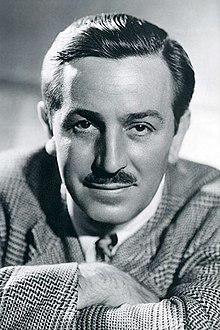

['//upload.wikimedia.org/wikipedia/commons/thumb/d/df/Walt_Disney_1946.JPG/220px-Walt_Disney_1946.JPG']


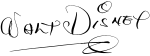

['//upload.wikimedia.org/wikipedia/commons/thumb/8/87/Walt_Disney_1942_signature.svg/150px-Walt_Disney_1942_signature.svg.png']


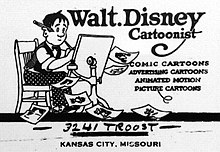

['//upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Walt_Disney_envelope_ca._1921.jpg/220px-Walt_Disney_envelope_ca._1921.jpg']


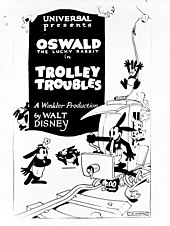

['//upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Trolley_Troubles_poster.jpg/170px-Trolley_Troubles_poster.jpg']


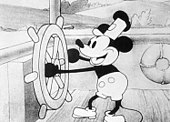

['//upload.wikimedia.org/wikipedia/en/thumb/4/4e/Steamboat-willie.jpg/170px-Steamboat-willie.jpg']


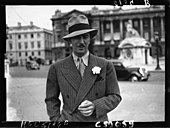

['//upload.wikimedia.org/wikipedia/commons/thumb/5/57/Walt_Disney_1935.jpg/170px-Walt_Disney_1935.jpg']


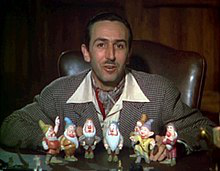

['//upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Walt_Disney_Snow_white_1937_trailer_screenshot_%2813%29.jpg/220px-Walt_Disney_Snow_white_1937_trailer_screenshot_%2813%29.jpg']


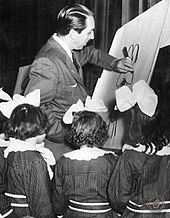

['//upload.wikimedia.org/wikipedia/commons/thumb/1/15/Disney_drawing_goofy.jpg/170px-Disney_drawing_goofy.jpg']


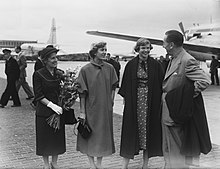

['//upload.wikimedia.org/wikipedia/commons/thumb/1/13/DisneySchiphol1951.jpg/220px-DisneySchiphol1951.jpg']


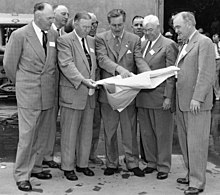

['//upload.wikimedia.org/wikipedia/commons/thumb/8/8c/WaltDisneyplansDisneylandDec1954.jpg/220px-WaltDisneyplansDisneylandDec1954.jpg']


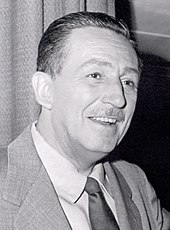

['//upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Walt_disney_portrait_right.jpg/170px-Walt_disney_portrait_right.jpg']


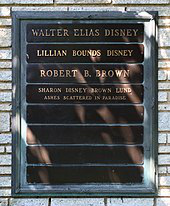

['//upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Walt_Disney_Grave.JPG/170px-Walt_Disney_Grave.JPG']


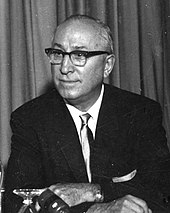

['//upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Roy_O._Disney_with_Company_at_Press_Conference.jpg/170px-Roy_O._Disney_with_Company_at_Press_Conference.jpg']


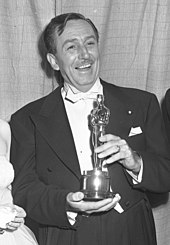

['//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Disney_Oscar_1953_%28cropped%29.jpg/170px-Disney_Oscar_1953_%28cropped%29.jpg']


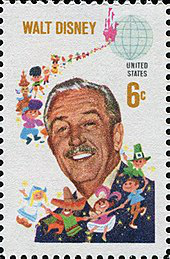

['//upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Disney1968.jpg/170px-Disney1968.jpg']


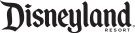

['//upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Disneyland_Resort_logo.svg/135px-Disneyland_Resort_logo.svg.png']


['//upload.wikimedia.org/wikipedia/commons/thumb/d/da/Animation_disc.svg/30px-Animation_disc.svg.png']


['//upload.wikimedia.org/wikipedia/en/thumb/6/69/P_vip.svg/29px-P_vip.svg.png']


['//upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Magic_Kingdom_castle.jpg/24px-Magic_Kingdom_castle.jpg']


['//upload.wikimedia.org/wikipedia/en/thumb/e/e7/Video-x-generic.svg/30px-Video-x-generic.svg.png']


['//upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Flag_of_Los_Angeles_County%2C_California.svg/30px-Flag_of_Los_Angeles_County%2C_California.svg.png']


['//upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Blank_television_set.svg/30px-Blank_television_set.svg.png']


['//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/30px-Flag_of_the_United_States.svg.png']


In [3]:
# your code here
url3 = 'https://en.wikipedia.org/wiki/Walt_Disney'
response3 = requests.get(url3)
html3 = response3.content
soup3 = bs4.BeautifulSoup(html3, "html.parser")#parseo
stew3 = soup3.find_all('a',{'class':'image'})
for element in stew3:
    image = element.find('img').get('src')
    images=[]
    images.append(image)
    for i in images:
        response_img = requests.get('https:'+i)
        img = Image.open(io.BytesIO(response_img.content))
        display(img)
        print(images)

#### Retrieve an arbitary Wikipedia page of "Python" and create a list of links on that page.

In [ ]:
# This is the url you will scrape in this exercise
url ='https://en.wikipedia.org/wiki/Python' 

In [51]:
# your code here
url4 = 'https://en.wikipedia.org/wiki/Python'
response4 = requests.get(url4)
html4 = response4.content
soup4 = bs4.BeautifulSoup(html4, "html.parser")#parseo
stew4 = soup4.find_all('a',{'href':re.compile('wiki')})
links=[]
for a in stew4:
     links.append(a['href'])

In [52]:
links

['https://en.wiktionary.org/wiki/Python',
 'https://en.wiktionary.org/wiki/python',
 '/wiki/Pythonidae',
 '/wiki/Python_(genus)',
 '/wiki/Python_(programming_language)',
 '/wiki/CMU_Common_Lisp',
 '/wiki/PERQ#PERQ_3',
 '/wiki/Python_of_Aenus',
 '/wiki/Python_(painter)',
 '/wiki/Python_of_Byzantium',
 '/wiki/Python_of_Catana',
 '/wiki/Python_Anghelo',
 '/wiki/Python_(Efteling)',
 '/wiki/Python_(Busch_Gardens_Tampa_Bay)',
 '/wiki/Python_(Coney_Island,_Cincinnati,_Ohio)',
 '/wiki/Python_(automobile_maker)',
 '/wiki/Python_(Ford_prototype)',
 '/wiki/Python_(missile)',
 '/wiki/Python_(nuclear_primary)',
 '/wiki/Colt_Python',
 '/wiki/PYTHON',
 '/wiki/Python_(film)',
 '/wiki/Python_(mythology)',
 '/wiki/Monty_Python',
 '/wiki/Python_(Monty)_Pictures',
 '/wiki/Cython',
 '/wiki/Pyton',
 '/wiki/Pithon',
 '/wiki/File:Disambig_gray.svg',
 '/wiki/Help:Disambiguation',
 'https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Python&namespace=0',
 'https://en.wikipedia.org/w/index.php?title

#### Find the number of titles that have changed in the United States Code since its last release point.

In [5]:
# This is the url you will scrape in this exercise HECHO
url = 'http://uscode.house.gov/download/download.shtml'

In [11]:
# your code here
url5 = 'http://uscode.house.gov/download/download.shtml'
response5 = requests.get(url5)
html5 = response5.content
soup5 = bs4.BeautifulSoup(html5, 'html.parser')
stew5=soup5.find_all('div',{'class':'usctitlechanged'})
tag_usa = [tag.text.replace('\n','').strip() for tag in stew5]
tag_usa

['Title 31 - Money and Finance ٭']

#### Find a Python list with the top ten FBI's Most Wanted names.

In [ ]:
# This is the url you will scrape in this exercise HECHO
url = 'https://www.fbi.gov/wanted/topten'

In [12]:
# your code here
url6 = 'https://www.fbi.gov/wanted/topten'
response6 = requests.get(url6)
html6 = response6.content
soup6 = bs4.BeautifulSoup(html6, 'html.parser')
stew6=soup6.find_all('h3',{'class':'title'})
tag_Police = [tag.a.string for tag in stew6]
tag_Police

['JASON DEREK BROWN',
 'ALEXIS FLORES',
 'JOSE RODOLFO VILLARREAL-HERNANDEZ',
 'OCTAVIANO JUAREZ-CORRO',
 'RAFAEL CARO-QUINTERO',
 'YULAN ADONAY ARCHAGA CARIAS',
 'EUGENE PALMER',
 'BHADRESHKUMAR CHETANBHAI PATEL',
 'ALEJANDRO ROSALES CASTILLO',
 'ARNOLDO JIMENEZ']

####  Display the 20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe.

In [14]:
# This is the url you will scrape in this exercise
url = 'https://www.emsc-csem.org/Earthquake/'

In [15]:
# your code here
url7 = 'https://www.emsc-csem.org/Earthquake/'
html5 = requests.get(url7).content
df_list = pd.read_html(html5)[3]
df_list.drop(['CitizenResponse','Depth km','Mag [+]','Last update [-]', 'Unnamed: 12_level_0'], axis=1)


/Users/albertofernandez/miniconda3/envs/ironhack/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Date & Time UTC Latitude degrees                  \
                         12345678910»    12345678910» 12345678910».1   
0       2021-12-17 17:41:03.023min ago             9.26               S   
1       2021-12-17 17:39:11.025min ago            31.46               N   
2       2021-12-17 17:35:44.029min ago             8.47               N   
3       2021-12-17 17:25:07.139min ago            19.24               N   
4       2021-12-17 17:24:45.040min ago             7.71               S   
5       2021-12-17 17:21:22.843min ago            19.21               N   
6       2021-12-17 17:19:20.045min ago             7.46               S   
7   2021-12-17 17:04:07.81hr 00min ago            18.75               N   
8   2021-12-17 17:01:12.01hr 03min ago            35.43               N   
9   2021-12-17 16:57:39.21hr 07min ago            28.10               N   
10  2021-12-17 16:36:12.51hr 28min ago            28.60               N   
11  2021-12-17 16:32:05.71hr 32min ago            28.56               N   
12  2021-12-17 16:31:40.01hr 33min ago             7.43               S   
13  2021-12-17 16:29:03.01hr 35min ago             1.81               S   
14  2021-12-17 16:25:04.01hr 39min ago            28.58               N   
15  2021-12-17 16:21:56.81hr 43min ago            41.37               S   
16  2021-12-17 16:08:31.01hr 56min ago            41.12               N   
17  2021-12-17 16:00:25.02hr 04min ago            21.23               S   
18  2021-12-17 15:49:49.82hr 15min ago            19.21               N   
19  2021-12-17 15:49:42.02hr 15min ago            28.60               N   
20  2021-12-17 15:45:09.32hr 19min ago            28.57               N   
21  2021-12-17 15:44:10.02hr 20min ago             0.27               S   
22  2021-12-17 15:40:25.92hr 24min ago            37.74               S   
23  2021-12-17 15:39:34.02hr 25min ago             7.93               S   
24  2021-12-17 15:39:26.02hr 25min ago            40.38               S   
25  2021-12-17 15:32:31.02hr 32min ago            21.15               S   
26  2021-12-17 15:31:56.02hr 33min ago             6.92               S   
27  2021-12-17 15:24:47.02hr 40min ago            21.41               N   
28  2021-12-17 15:06:30.42hr 58min ago            28.62               N   
29  2021-12-17 15:04:44.03hr 00min ago            24.00               S   
30  2021-12-17 14:58:05.03hr 06min ago            12.86               N   
31  2021-12-17 14:54:59.93hr 10min ago            28.56               N   
32  2021-12-17 14:51:30.83hr 13min ago            19.21               N   
33  2021-12-17 14:45:12.13hr 19min ago            19.19               N   
34  2021-12-17 14:41:02.03hr 24min ago            12.79               N   
35  2021-12-17 14:38:38.03hr 26min ago             1.15               N   
36  2021-12-17 14:34:58.03hr 30min ago             1.18               N   
37  2021-12-17 14:28:55.83hr 36min ago            12.92               N   
38  2021-12-17 14:24:18.03hr 40min ago            18.14               N   
39  2021-12-17 14:23:43.93hr 41min ago            38.66               N   
40  2021-12-17 14:17:38.83hr 47min ago            19.22               N   
41  2021-12-17 14:15:33.03hr 49min ago             7.74               S   
42  2021-12-17 14:12:11.63hr 52min ago            39.33               N   
43  2021-12-17 13:58:33.84hr 06min ago            16.96               N   
44  2021-12-17 13:54:18.64hr 10min ago            36.89               S   
45  2021-12-17 13:49:53.04hr 15min ago             8.02               S   
46  2021-12-17 13:39:58.24hr 25min ago            40.56               S   
47  2021-12-17 13:12:43.14hr 52min ago            19.20               N   
48  2021-12-17 13:12:34.24hr 52min ago            28.60               N   
49  2021-12-17 13:10:12.94hr 54min ago            19.21               N   
50                                 NaN              NaN             NaN   
51                       12345678910»    123456

#### Count the number of tweets by a given Twitter account.
Ask the user for the handle (@handle) of a twitter account. You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the number of tweets for any provided account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code here
#Estoy en ello. Por favor, ¿me podeis facilitar la solución? Gracias.

#### Number of followers of a given twitter account
Ask the user for the handle (@handle) of a twitter account. You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the followers for any provided account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code here
#Estoy en ello. Por favor, ¿me podeis facilitar la solución? Gracias.

#### List all language names and number of related articles in the order they appear in wikipedia.org.

In [ ]:
# This is the url you will scrape in this exercise HECHO
url = 'https://www.wikipedia.org/'

In [18]:
# your code here
url10 = 'https://www.wikipedia.org/'
response10 = requests.get(url10)
html10 = response10.content
soup10 = bs4.BeautifulSoup(html10, 'html.parser')

In [24]:
idioma= [tag.strong.string for tag in soup10.find_all('a',{'class':'link-box'})]

In [21]:
num_art= [tag.bdi.string for tag in soup10.find_all('a',{'class':'link-box'})]
num=[]
for i in num_art:
    num.append(re.sub('\xa0','',i))

In [23]:
art = [tag.span.string for tag in soup10.find_all('a',{'class':'link-box'})]

In [42]:
result=[]
for i in range(len(idioma)):
    result.append(idioma[i]+", "+num[i]+", "+art[i])

result

['English, 6383000+, articles',
 '日本語, 1292000+, 記事',
 'Русский, 1756000+, статей',
 'Deutsch, 2617000+, Artikel',
 'Español, 1717000+, artículos',
 'Français, 2362000+, articles',
 '中文, 1231000+, 條目',
 'Italiano, 1718000+, voci',
 'Português, 1074000+, artigos',
 'Polski, 1490000+, haseł']

#### A list with the different kind of datasets available in data.gov.uk.

In [ ]:
# This is the url you will scrape in this exercise HECHO
url = 'https://data.gov.uk/'

In [28]:
# your code here
url11 = 'https://data.gov.uk/'
response11 = requests.get(url11)
html11 = response11.content
soup11 = bs4.BeautifulSoup(html11, 'html.parser')
stew11=soup11.find_all('h3',{'class':'govuk-heading-s dgu-topics__heading'})
tag_dataset = [tag.a.string for tag in stew11]
tag_dataset

['Business and economy',
 'Crime and justice',
 'Defence',
 'Education',
 'Environment',
 'Government',
 'Government spending',
 'Health',
 'Mapping',
 'Society',
 'Towns and cities',
 'Transport',
 'Digital service performance',
 'Government reference data']

#### Display the top 10 languages by number of native speakers stored in a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise
url12 = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'

In [56]:
# your code here
url12 = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'
html12 = requests.get(url12).content
df_list = pd.read_html(html12)[1]
df_list.head(10)


,Rank,Language,Speakers(millions),Percentageof world pop.(March 2019)[10],Language family,Branch
0,1,Mandarin Chinese,918.0,11.922%,Sino-Tibetan,Sinitic
1,2,Spanish,480.0,5.994%,Indo-European,Romance
2,3,English,379.0,4.922%,Indo-European,Germanic
3,4,Hindi (sanskritised Hindustani)[11],341.0,4.429%,Indo-European,Indo-Aryan
4,5,Bengali,300.0,4.000%,Indo-European,Indo-Aryan
5,6,Portuguese,221.0,2.870%,Indo-European,Romance
6,7,Russian,154.0,2.000%,Indo-European,Balto-Slavic
7,8,Japanese,128.0,1.662%,Japonic,Japanese
8,9,Western Punjabi[12],92.7,1.204%,Indo-European,Indo-Aryan
9,10,Marathi,83.1,1.079%,Indo-European,Indo-Aryan


## Bonus
#### Scrape a certain number of tweets of a given Twitter account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code here

#### Display IMDB's top 250 data (movie name, initial release, director name and stars) as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise 
url = 'https://www.imdb.com/chart/top'

In [ ]:
# your code here

#### Display the movie name, year and a brief summary of the top 10 random movies (IMDB) as a pandas dataframe.

In [ ]:
#This is the url you will scrape in this exercise
url = 'http://www.imdb.com/chart/top'

In [ ]:
# your code here

#### Find the live weather report (temperature, wind speed, description and weather) of a given city.

In [ ]:
#https://openweathermap.org/current
city = input('Enter the city: ')
url = 'http://api.openweathermap.org/data/2.5/weather?'+'q='+city+'&APPID=b35975e18dc93725acb092f7272cc6b8&units=metric'

In [ ]:
# your code here

#### Find the book name, price and stock availability as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise. 
# It is a fictional bookstore created to be scraped. 
url = 'http://books.toscrape.com/'

In [ ]:
# your code here